In [ ]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [ ]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.options.display.float_format = lambda x: '%.2f' % x

In [ ]:
subsidio_df = pd.read_csv('./data/subsidio_familiar_mar_2018.csv')

In [ ]:
subsidio_df.shape

(43, 11)

In [ ]:
subsidio_df.dtypes

Código                                          int64
CCF                                            object
Empresas Afiliadas                              int64
Total Afiliados Cajas Compensacion Familiar     int64
Trabajadores Afiliados Dependientes             int64
Afiliados Facultativos Independientes           int64
Afiliados Pensionados                           int64
Afiliados Fidelidad                             int64
No Afiliados con Derecho a Subsidio             int64
Personas Cargo                                  int64
Total Población Cubierta                        int64
dtype: object

In [ ]:
subsidio_df.head()

,Código,CCF,Empresas Afiliadas,Total Afiliados Cajas Compensacion Familiar,Trabajadores Afiliados Dependientes,Afiliados Facultativos Independientes,Afiliados Pensionados,Afiliados Fidelidad,No Afiliados con Derecho a Subsidio,Personas Cargo,Total Población Cubierta
0,2,Caja de Compensacion Familiar Camacol COMFAMIL...,1236,19966,19912,54,0,0,0,29200,49166
1,3,Caja de Compensacion Familiar COMFENALCO ANTIO...,19358,406702,393749,6930,1773,154,4096,460782,867484
2,4,Caja de Compensacion Familiar de Antioquia COM...,92801,1129424,1086201,18290,4834,9775,10324,1306833,2436257
3,5,Caja de Compensación Familiar CAJACOPI BARRANQ...,2973,52635,52098,122,48,0,367,94472,147107
4,6,Caja de Compensacion Familiar de Barranquilla ...,10245,151014,146866,816,220,0,3112,195078,346092


In [ ]:
X = subsidio_df[subsidio_df.columns.tolist()[2:]]

In [ ]:
X.head()

,Empresas Afiliadas,Total Afiliados Cajas Compensacion Familiar,Trabajadores Afiliados Dependientes,Afiliados Facultativos Independientes,Afiliados Pensionados,Afiliados Fidelidad,No Afiliados con Derecho a Subsidio,Personas Cargo,Total Población Cubierta
0,1236,19966,19912,54,0,0,0,29200,49166
1,19358,406702,393749,6930,1773,154,4096,460782,867484
2,92801,1129424,1086201,18290,4834,9775,10324,1306833,2436257
3,2973,52635,52098,122,48,0,367,94472,147107
4,10245,151014,146866,816,220,0,3112,195078,346092


In [ ]:
n_clusters = 4

In [ ]:
model = KMeans(n_clusters = n_clusters)

In [ ]:
clusters = model.fit_predict(X)

In [ ]:
subsidio_df[ 'cluster' ] = clusters

In [ ]:
subsidio_df.head()

,Código,CCF,Empresas Afiliadas,Total Afiliados Cajas Compensacion Familiar,Trabajadores Afiliados Dependientes,Afiliados Facultativos Independientes,Afiliados Pensionados,Afiliados Fidelidad,No Afiliados con Derecho a Subsidio,Personas Cargo,Total Población Cubierta,cluster
0,2,Caja de Compensacion Familiar Camacol COMFAMIL...,1236,19966,19912,54,0,0,0,29200,49166,0
1,3,Caja de Compensacion Familiar COMFENALCO ANTIO...,19358,406702,393749,6930,1773,154,4096,460782,867484,3
2,4,Caja de Compensacion Familiar de Antioquia COM...,92801,1129424,1086201,18290,4834,9775,10324,1306833,2436257,1
3,5,Caja de Compensación Familiar CAJACOPI BARRANQ...,2973,52635,52098,122,48,0,367,94472,147107,0
4,6,Caja de Compensacion Familiar de Barranquilla ...,10245,151014,146866,816,220,0,3112,195078,346092,3


In [ ]:
subsidio_df['cluster'].value_counts()

0    24
3    14
1     3
2     2
Name: cluster, dtype: int64

In [ ]:
subsidio_df.loc[subsidio_df['cluster'] == 2]

,Código,CCF,Empresas Afiliadas,Total Afiliados Cajas Compensacion Familiar,Trabajadores Afiliados Dependientes,Afiliados Facultativos Independientes,Afiliados Pensionados,Afiliados Fidelidad,No Afiliados con Derecho a Subsidio,Personas Cargo,Total Población Cubierta,cluster
14,21,Caja de Compensacion Familiar CAFAM,45216,837046,662904,151251,8958,6788,7145,808245,1645291,2
36,57,Caja de Compensacion Familiar del Valle del Ca...,46221,603885,590416,7130,6339,0,0,723626,1327511,2


In [ ]:
silhouette_avg = silhouette_score(X, clusters)
silhouette_avg

0.5629613566146034

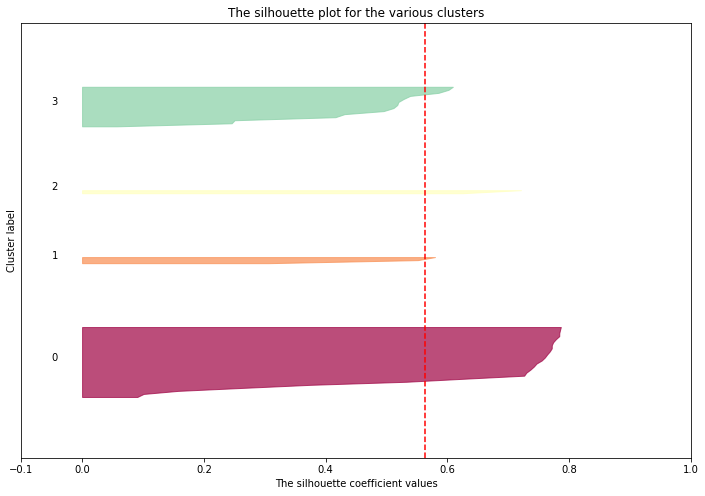

In [ ]:
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(12, 8)

ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 20])

sample_silhouette_values = silhouette_samples(X, clusters)

y_lower = 20
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.get_cmap('Spectral')(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor = color, edgecolor = color, alpha = 0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 20

ax1.set_title('The silhouette plot for the various clusters')
ax1.set_xlabel('The silhouette coefficient values')
ax1.set_ylabel('Cluster label')

ax1.axvline(x = silhouette_avg, color = 'red', linestyle = '--')

ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [ ]:
subsidio_df.groupby( 'cluster' ).describe(percentiles = [.5])[subsidio_df.columns.tolist()[2:-1]]

Empresas Afiliadas                                              \
                     count     mean     std      min      50%      max   
cluster                                                                  
0                    24.00  3894.12 2648.83   550.00  3075.50  8728.00   
1                     3.00 89404.33 3328.72 86148.00 89264.00 92801.00   
2                     2.00 45718.50  710.64 45216.00 45718.50 46221.00   
3                    14.00 13347.43 4315.37  6610.00 12634.50 19644.00   

        Total Afiliados Cajas Compensacion Familiar                       \
                                              count       mean       std   
cluster                                                                    
0                                             24.00   52285.67  37258.69   
1                                              3.00 1349157.33 277572.99   
2                                              2.00  720465.50 164869.72   
3                                             14.00  198015.07  78452.25   

                                         Trabajadores Afiliados Dependientes  \
               min        50%        max                               count   
cluster                                                                        
0          4747.00   49853.00  125674.00                               24.00   
1       1129424.00 1256948.00 1661100.00                                3.00   
2        603885.00  720465.50  837046.00                                2.00   
3        102244.00  178691.50  406702.00                               14.00   

                                                               \
              mean       std        min        50%        max   
cluster                                                         
0         48947.62  33500.87    4712.00   48993.50  114004.00   
1       1281246.67 288200.85 1086201.00 1145258.00 1612281.00   
2        626660.00  51256.76  590416.00  626660.00  662904.00   
3        184520.14  79784.56  101771.00  166654.50  393749.00   

        Afiliados Facultativos Independientes                              \
                                        count     mean       std      min   
cluster                                                                     
0                                       24.00   236.50    292.47     6.00   
1                                        3.00 34268.33  27553.27 18290.00   
2                                        2.00 79190.50 101908.94  7130.00   
3                                       14.00  1549.50   1986.16   191.00   

                           Afiliados Pensionados                           \
             50%       max                 count     mean     std     min   
cluster                                                                     
0         147.50   1333.00                 24.00   113.79  202.72    0.00   
1       18431.00  66084.00                  3.00 12138.00 8723.27 4834.00   
2       79190.50 151251.00                  2.00  7648.50 1851.91 6339.00   
3         784.50   6930.00                 14.00   602.00  770.73   42.00   

                         Afiliados Fidelidad                                   \
            50%      max               count    mean      std     min     50%   
cluster                                                                         
0         13.50   802.00               24.00 2632.29  9245.55    0.00    0.00   
1       9783.00 21797.00                3.00 7954.33  1604.47 6747.00 7341.00   
2       7648.50  8958.00                2.00 3394.00  4799.84    0.00 3394.00   
3        218.50  2497.00               14.00 9355.50 21776.72    0.00  459.50   

                 No Afiliados con Derecho a Subsidio                   \
             max                               count     mean     std   
cluster                                                                 
0       41655.00                               24.00   355.46  509.50   